In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

#### Importing Data sets

In [123]:

sindhdata_enrollment= pd.read_csv("enrollment.csv")
sindhdata_facilities= pd.read_csv("facilties.csv")
sindhdata_pivotTable= pd.read_csv("pivotTable.csv")

#### Number of Enrollment in each District


Text(0.5, 1.0, 'Khairpur Mirs has the highest enrollment in all  dictricts')

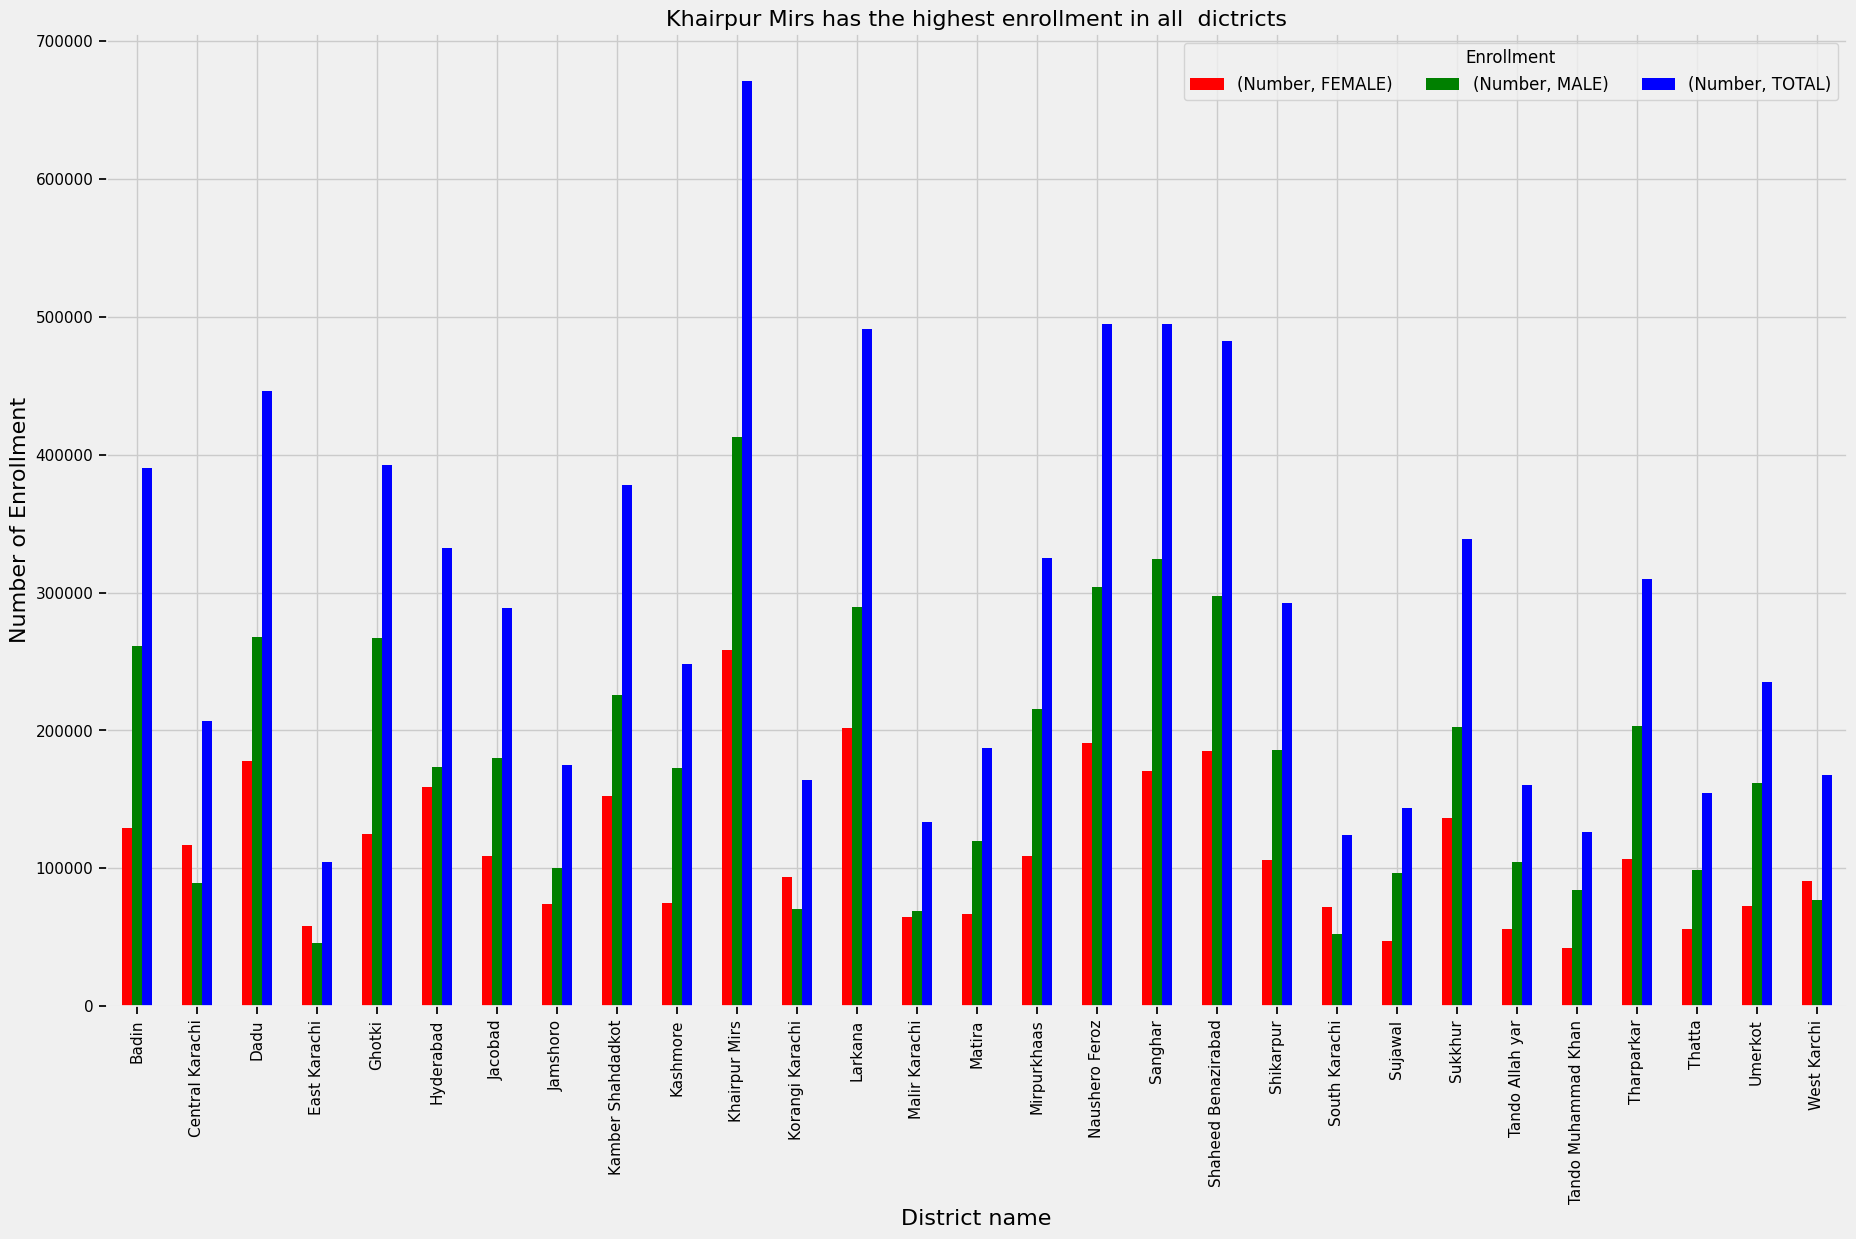

In [124]:
enrollment_info= sindhdata_enrollment[sindhdata_enrollment["Category"]=="ENROLMENT"]
enrollment_info=enrollment_info.drop(["No/100000"], axis=1)
enrollmentPlot= enrollment_info.groupby(["District","Composition"]).sum().unstack().plot(kind='bar', color=['red', 'green', 'blue'], figsize=(20,12))
enrollmentPlot.set_xlabel("District name",fontsize=16)
enrollmentPlot.set_ylabel("Number of Enrollment",fontsize=16)
enrollmentPlot.legend(title="Enrollment", fontsize=12, loc='upper right', ncol=len(enrollment_info['District'].unique()))
enrollmentPlot.set_title("Khairpur Mirs has the highest enrollment in all  dictricts", fontsize=16)


##### Number of mixed Schools in each district


Text(0, 0.5, 'Number of Mixed Schools')

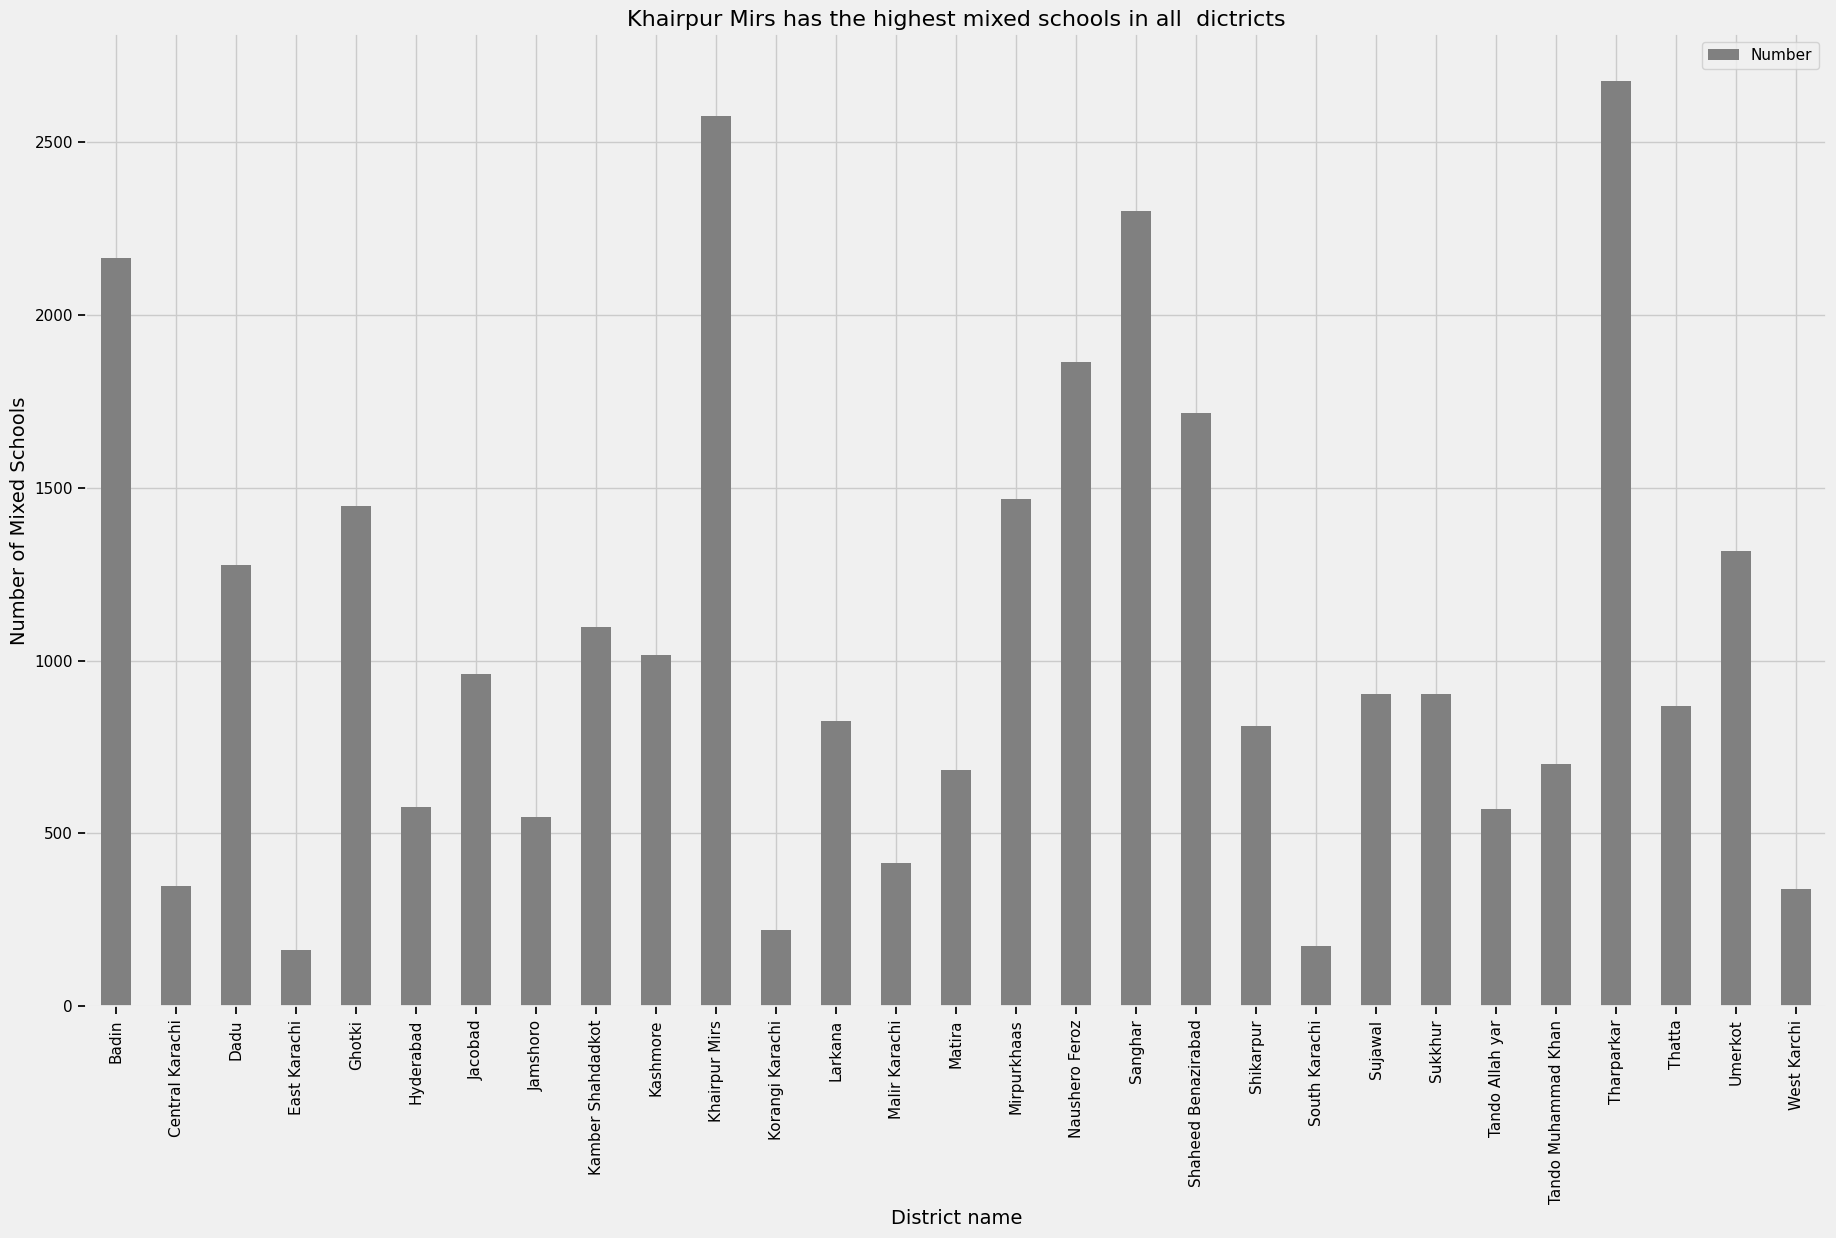

In [125]:
enroll_my= sindhdata_enrollment[(sindhdata_enrollment["Category"]=="INSTITUTIONS") & (sindhdata_enrollment["Location"]=="Total") & (sindhdata_enrollment["Composition"]=="MIXED")]
enroll_my=enroll_my.drop(["No/100000"], axis=1)
result=enroll_my.groupby(["District","Category", "Composition"]).sum().plot(kind='bar', color='gray', figsize=(20, 12))
mylabels = (list(sindhdata_enrollment["District"].unique()))
mylabels.sort()
result.set_xticklabels(mylabels, rotation=90)
result.set_xlabel("District name",fontsize=16)
result.set_title("Khairpur Mirs has the highest mixed schools in all  dictricts", fontsize=16)
result.set_xlabel("District name", fontsize=14)
result.set_ylabel("Number of Mixed Schools", fontsize=14)


#### Comparison of Mixed Schools with Total Enrollment per District

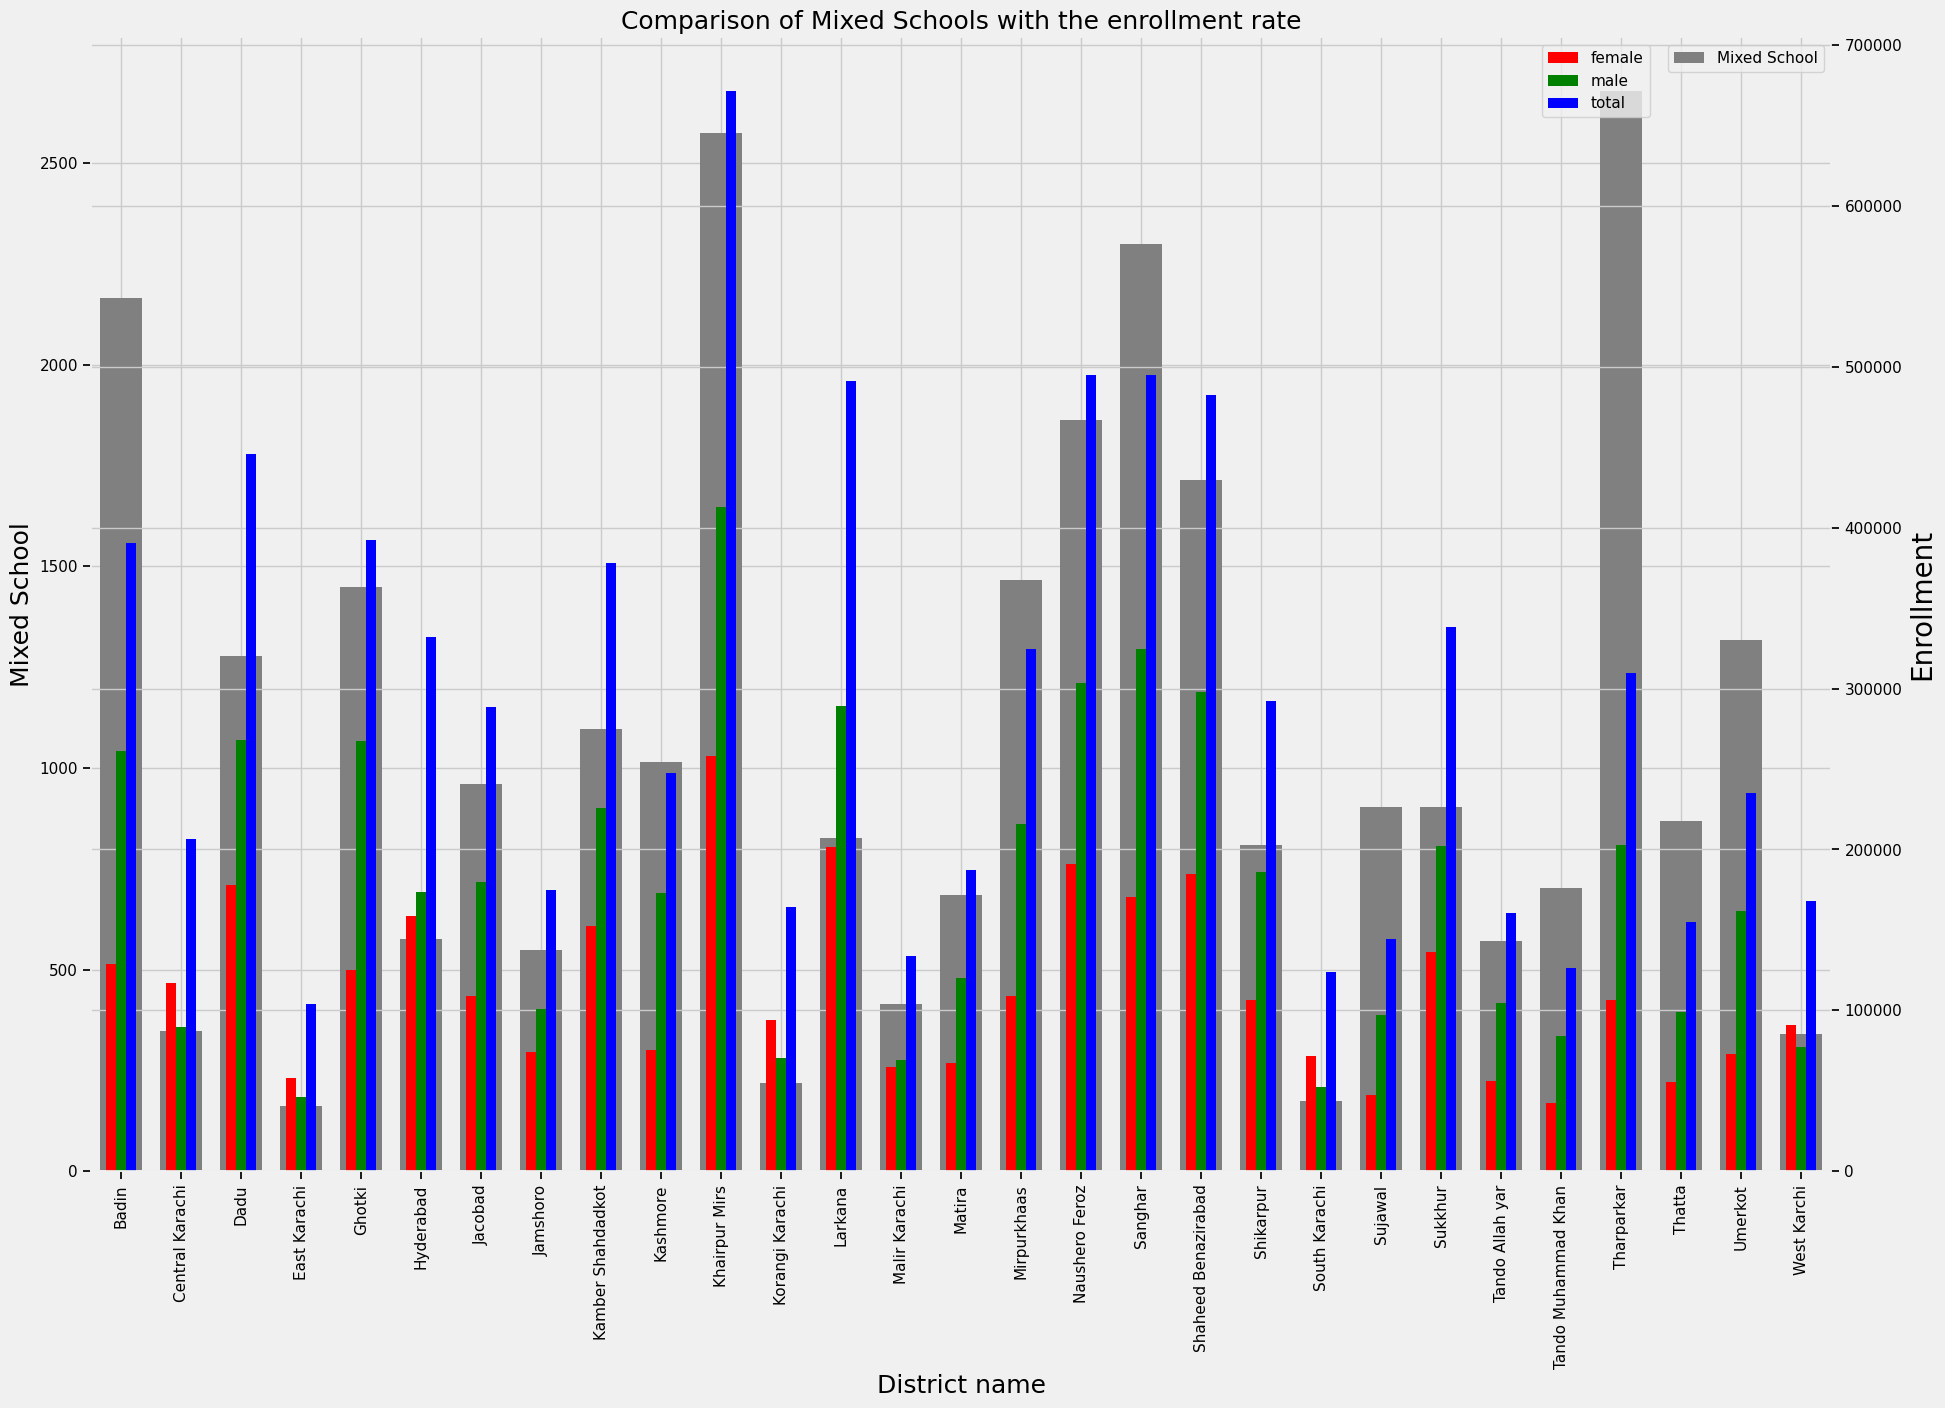

In [130]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20, 14))

enroll_my.groupby(["District", "Category", "Composition"]).sum().plot(
    kind='bar', color='gray', ax=ax1, label="mixed" ,width=0.7)
mylabels = list(sindhdata_enrollment["District"].unique())
ax1.set_xticklabels(mylabels, rotation=90)
ax1.set_xlabel("District name", fontsize=18)
ax1.set_ylabel('Mixed School', fontsize=18)
ax1.legend(["Mixed School"])


ax2 = ax1.twinx()

enrollment_info.groupby(["District", "Composition"]).sum().unstack().plot(
    kind='bar', color=['red', 'green', 'blue'], ax=ax2)
ax2.set_ylabel('Enrollment', fontsize=20)

# Add the legend with the labels "male", "female", "total", and "mixed"
plt.legend(['female', 'male', "total", "Mixed School"],
           loc="upper right", bbox_to_anchor=(0.9, 1))

plt.title("Comparison of Mixed Schools with the enrollment rate", fontsize=18)
plt.show()


#### Findings

The plot presented above suggests a positive correlation between the number of co-educational (mixed) schools and the total enrollment in each district. Specifically, it appears that an increase in the number of co-ed schools is associated with higher enrollment rates. However, there are a few exceptions to this trend, such as in Tharparkar, where the number of co-ed schools is high, but the enrollment rate is significantly lower. This could be due to other factors, such as poor facilities, that may impact enrollment rates.

Moreover, it seems that districts with a higher number of co-ed schools also have higher female enrollment rates. This could indicate that districts with more co-ed schools have a more educated population that is more accepting of female education. It is important to note that while these correlations may exist, they do not necessarily imply causation. Other factors may also contribute to these trends, and further research is needed to confirm any causal relationships.

In conclusion, it is important to approach this data with caution and to conduct further research to fully understand the complex relationship between the number of co-ed schools and enrollment rates in each district, as well as any potential confounding factors that may impact this relationship.